<div id="container" style="position:relative;">
<div style="float:left"><h1> BrainStation Capstone </h1></div>
<div style="position:relative; float:right"><img style="height:65px" src ="https://drive.google.com/uc?export=view&id=1EnB0x-fdqMp6I5iMoEBBEuxB_s7AmE2k" />
</div>
</div>

### *Brain tumor detection & Machine learning*

`Notebook 3: Working with the XG-Boost and CNN models` <br>
Author: Bilal Munir <br>
Date: June 2023

## Loading the data...

In [1]:
# Importing the holy quartet of libraries
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

# Library for importing and opening images
from PIL import Image

# SKLEARN Imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

# Importing the os library to navigate directories to access the data
import os

In [2]:
# Loading the saved tumor dataframe from the 224x224 notebook
tum_df = pd.read_csv('data/Tumors_df.csv')
tum_df.head()

,Tumor_Class,file_path,Tumor_Presence
0,Astrocitoma T1,data/raw/Astrocitoma T1/005_big_gallery.jpeg,1
1,Astrocitoma T1,data/raw/Astrocitoma T1/006_big_gallery.jpeg,1
2,Astrocitoma T1,data/raw/Astrocitoma T1/01809e58d2c1e7fff56cc5...,1
3,Astrocitoma T1,data/raw/Astrocitoma T1/02df132a56dfb89ece42ee...,1
4,Astrocitoma T1,data/raw/Astrocitoma T1/044d8d9984902ca03e652a...,1


In [3]:
file_paths = tum_df['file_path']

In [4]:
imgs = []

for path in file_paths:
        
    # Opening the images
    img = Image.open(path)
        
    # Resizing the images to 224x224
    img = img.resize((224, 224))
        
    # Converting images to grayscale
    img = img.convert(mode='L')
        
    # Loading the normalized image
    load_img = np.asarray(img)
        
    # then append grayscaled images
    imgs.append(load_img)

In [5]:
stacked_images = np.stack(imgs, axis=0)
stacked_images

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[2, 2, 2, ..., 2, 2, 2],
        [2, 2, 2, ..., 2, 2, 2],
        [2, 2, 2, ..., 2, 2, 2],
        ...,
        [2, 2, 2, ..., 2, 2, 2],
        [2, 2, 2, ..., 2, 2, 2],
        [2, 2, 2, ..., 2, 2, 2]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [6]:
stacked_images.shape

(4479, 224, 224)

### Preparation for fitting

In [7]:
X = stacked_images.reshape(-1, 224*224)
y = tum_df['Tumor_Presence']

In [8]:
# Splitting into train and validation sets
X_rem, X_test, y_rem, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=24)
X_train, X_val, y_train, y_val = train_test_split(X_rem, y_rem, test_size=0.20, stratify=y_rem, random_state=24)

In [9]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Using XG-Boost

In [ ]:
#in case the below cell does not run.
#pip install xgboost

In [10]:
# Importing XGBoost Classifier
from xgboost import XGBClassifier
xgbc = XGBClassifier()
xgbc.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

Testing the XG BOOST on both Validation and test sets. Although it could be a bit to premature for it to do it on the TEST set. Might have to optimize parameters.

#### XGBOOST VALIDATION RESULTS:

In [11]:
y_pred = xgbc.predict(X_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.71      0.83        78
           1       0.96      1.00      0.98       594

    accuracy                           0.97       672
   macro avg       0.98      0.85      0.90       672
weighted avg       0.97      0.97      0.96       672



#### XGBOOST TEST RESULTS:

In [12]:
y_pred = xgbc.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.61      0.75       131
           1       0.95      1.00      0.97       989

    accuracy                           0.95      1120
   macro avg       0.97      0.80      0.86      1120
weighted avg       0.96      0.95      0.95      1120



**Yash's Suggestions:** Proper evaluation, Confusion matrix, precision vs recall, Threshold As well as introductory neural networks

In [13]:
# Generate confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

# label rows and columns
cf_df = pd.DataFrame(
    cf_matrix, 
    columns=["Predicted Non-Tumor", "Predicted Tumor"],
    index=["True Non-Tumor", "True Tumor"]
)

display(cf_df)

,Predicted Non-Tumor,Predicted Tumor
True Non-Tumor,80,51
True Tumor,1,988


Out of the **tumorless** class, 61% of the MRIs were predicted correctly. <br>
While, out of the **tumor-present** class, 100% of the MRIs were predicted correctly. <br>

Judging by the 88% to 11% class imbalance where **Tumor-ridden brains are the majority**, an *61%* relatively decent.

Overall model accuracy in this iteration is **95%**

## Convoluted Neural Networks (CNNs) - My First iteration

In [17]:
# Specific neural network models & layer types
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [18]:
# Check out the data
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_val shape: {X_val.shape}')
print(f'y_val shape: {y_val.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (2687, 50176)
y_train shape: (2687,)
X_val shape: (672, 50176)
y_val shape: (672,)
X_test shape: (1120, 50176)
y_test shape: (1120,)


We have 2687 images for training and around 1120 images for testing

Even though these have been split, the shapes are not ideal for the CNN model sequence. So we will redefine the **X and y** values by using the `stacked_images` variable.

In [19]:
X_new = stacked_images
y_new = tum_df['Tumor_Presence']

X_new.shape, y_new.shape

((4479, 224, 224), (4479,))

In [20]:
X_new = X_new.reshape(-1, 224, 224, 1)

In [21]:
# Splitting into train and validation sets
X_rem, X_test, y_rem, y_test = train_test_split(X_new, y_new, test_size=0.25, stratify=y_new, random_state=24)
X_train, X_val, y_train, y_val = train_test_split(X_rem, y_rem, test_size=0.20, stratify=y_rem, random_state=24)

In [22]:
CNN_model = Sequential()

# Create simple CNN model architecture with Pooling for dimensionality reduction 
# and Dropout to reduce overfitting
CNN_model.add(Conv2D(16, kernel_size=(3, 3), activation = 'relu', input_shape = (224, 224, 1)))
CNN_model.add(MaxPooling2D(pool_size=(2, 2)))
CNN_model.add(Dropout(0.25))

CNN_model.add(Conv2D(32, (3, 3), activation='relu'))
CNN_model.add(MaxPooling2D(pool_size=(2, 2)))
CNN_model.add(Dropout(0.25))

# Flatten the output of our convolutional layers
CNN_model.add(Flatten())

# Add dense layers
CNN_model.add(Dense(32, activation='relu'))
CNN_model.add(Dense(16, activation='relu'))
CNN_model.add(Dense(2, activation='softmax'))

# Print out a summary of the network
CNN_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 16)      160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 16)      0         
_________________________________________________________________
dropout (Dropout)            (None, 111, 111, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 54, 54, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 93312)             0

In [23]:
# Compile the model with the desired loss function, optimizer, and metric(s) to track
CNN_model.compile(loss = 'sparse_categorical_crossentropy',
                  optimizer = 'Adam',
                  metrics = ['accuracy'])

In [24]:
CNN_model.fit(X_rem, y_rem,
              batch_size = 128,
              epochs = 10,
              verbose = 1,
              validation_split = 0.2)

Epoch 1/10
21/21 [==============================] - 95s 5s/step - loss: 22.3436 - accuracy: 0.7700 - val_loss: 0.4654 - val_accuracy: 0.8363
Epoch 2/10
21/21 [==============================] - 88s 4s/step - loss: 0.7982 - accuracy: 0.7886 - val_loss: 0.6838 - val_accuracy: 0.5119
Epoch 3/10
21/21 [==============================] - 102s 5s/step - loss: 0.3452 - accuracy: 0.8723 - val_loss: 0.5652 - val_accuracy: 0.7783
Epoch 4/10
21/21 [==============================] - 91s 4s/step - loss: 0.2700 - accuracy: 0.8921 - val_loss: 0.4394 - val_accuracy: 0.8824
Epoch 5/10
21/21 [==============================] - 92s 4s/step - loss: 0.2274 - accuracy: 0.9055 - val_loss: 0.3013 - val_accuracy: 0.8869
Epoch 6/10
21/21 [==============================] - 91s 4s/step - loss: 0.1713 - accuracy: 0.9375 - val_loss: 0.2787 - val_accuracy: 0.8929
Epoch 7/10
21/21 [==============================] - 88s 4s/step - loss: 0.1436 - accuracy: 0.9479 - val_loss: 0.2757 - val_accuracy: 0.9092
Epoch 8/10
21/21 [

In [25]:
# Evaluate the model's performance on the test data
score = CNN_model.evaluate(X_test, y_test, verbose=1)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

35/35 [==============================] - 11s 318ms/step - loss: 0.2314 - accuracy: 0.8991
Test loss: 0.2314240038394928
Test accuracy: 0.8991071581840515


In [26]:
predict_probas = CNN_model.predict(X_test)
y_predict = np.argmax(predict_probas, axis=1)

# Generate confusion matrix
cf_matrix = confusion_matrix(y_test, y_predict)

# label rows and columns
cf_df = pd.DataFrame(
    cf_matrix, 
    columns=["Predicted Non-Tumor", "Predicted Tumor"],
    index=["True Non-Tumor", "True Tumor"]
)

display(cf_df)

,Predicted Non-Tumor,Predicted Tumor
True Non-Tumor,115,16
True Tumor,97,892


In [27]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.54      0.88      0.67       131
           1       0.98      0.90      0.94       989

    accuracy                           0.90      1120
   macro avg       0.76      0.89      0.81      1120
weighted avg       0.93      0.90      0.91      1120



An 88% recall out of the minority `tumorless` class is quite abnormally large. However the overall model accuracy remains at 90%

In [30]:
incorrect_photos = y_test != y_predict
sum(incorrect_photos)

113

There were a total of 113 incorrect classifications in this iteration of CNN

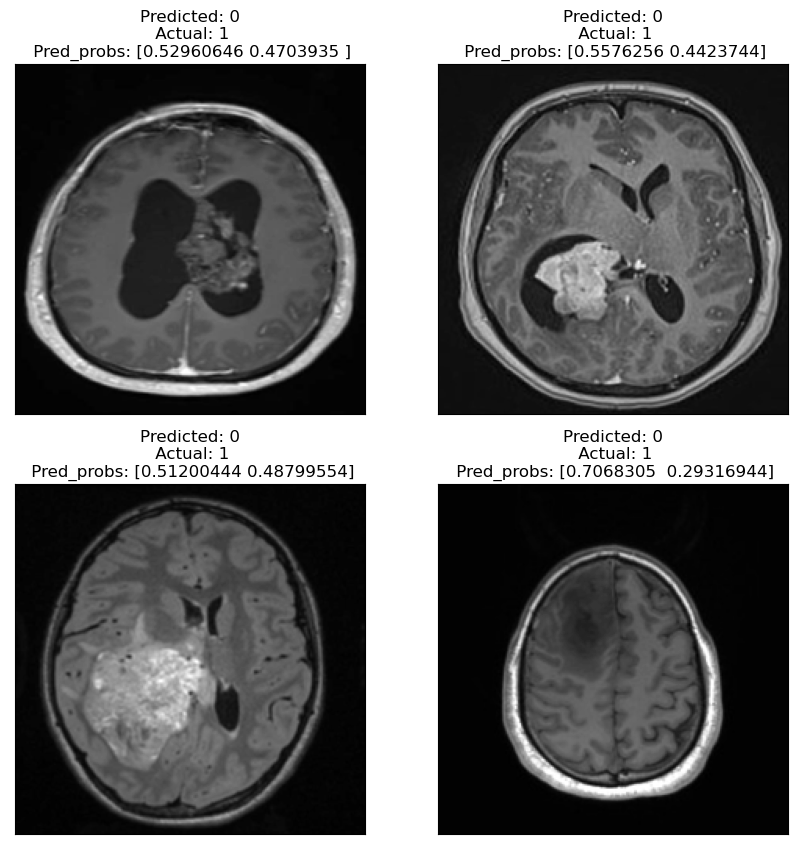

In [35]:
num_images = 4
columns = 2
rows = 2

fig, ax = plt.subplots(nrows=rows, ncols=columns, figsize=(10, 10))

ax = ax.flatten()

for i, image in enumerate(X_test[incorrect_photos][:num_images]):
    ax[i].imshow(image, cmap='gray')

    # Get predicted label
    prediction = y_predict[incorrect_photos][i]
    
    # Get actual label
    actual = y_test[incorrect_photos].iloc[i]
    
    # Get predicted probabilities
    Predicted_probs = predict_probas[incorrect_photos][i]
    
    # Set the title of the subplot
    ax[i].set_title(f"Predicted: {prediction}\n Actual: {actual}\n Pred_probs: {Predicted_probs}")
    
    # Hide the x and y ticks to make 
    ax[i].set_xticks([]) 
    ax[i].set_yticks([])

plt.show()
fig.tight_layout()

In [36]:
# Saving the second iteration of the CNN model
# CNN_model.save('saved_models/CNN_model_1')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: saved_models/CNN_model_1\assets
